In this notebook, my goal is to get a sample of the datasets. Both datasets are too big for my not very powerfull machine, and bigger than the 100MB file size limit to push to github. So I will first remove any info that won't be useful to me, and then take a sample that is large enough to keep the same distribution as the whole population, but small enough to make computation easier.

In [1]:
import time
notebook_start = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Insure that all columns and rows are displayed 
pd.options.display.max_columns = None
# pd.set_option('display.max_colwidth', None)

In [3]:
# start = time.time()
# accepted_df = pd.read_csv('../accepted_2007_to_2018Q4.csv.gz', low_memory=False)
# rejected_df = pd.read_csv('../rejected_2007_to_2018Q4.csv.gz', low_memory=False)
# feat_def = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
# print(accepted_df.shape)
# print(f"Reading the csv's take {round(time.time() - start)} seconds")
# accepted_df.head()

(2260701, 151)
Reading the csv's take 158 seconds


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300

First I will limit the dataset to loans that have defualted or have been fully paid since that is what I'm looking to predict.

In [4]:
# accepted_df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [5]:
# # only keep the loans that are paid or charged off.
# accepted_df = accepted_df[accepted_df.loan_status.isin(['Fully Paid', 'Charged Off'])]
# accepted_df.shape

(1345310, 151)

Just from that we dropped about a million loans. 

We need to check how much of these columns have missing values. If a variable has a high proportion of NaN's, that makes it very hard to know if the values that you do have are the true distribution. So I will drop any column that has more than 30% NaN's.

In [6]:
# accepted_df.isna().sum()

id                             0
member_id                1345310
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 151, dtype: int64

In [7]:
# # get a list of the column names that have more than 30% missing values, and drop those columns
# thirty_nan = [i for i in accepted_df.columns if accepted_df[i].isnull().sum() > 0.3*accepted_df.shape[0]]
# print('Droping ', len(thirty_nan), ' columns')
# accepted_df.drop(thirty_nan, axis=1, inplace=True)
# accepted_df.shape

Droping  58  columns


(1345310, 93)

We still have 93 columns, and most of those either aren't available to the investor at the time of investment, or are not relevant to the prediction. So I will start with keeping the most basic features, and if I can't get good results from my prediction, I will try to add some more features. Here's a look at the descriptions of each feature in the dataset.

In [8]:
# feat_def

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed to settle for
149,settlement_percentage,The settlement amount as a percentage of the payoff balance amount on the loan
150,settlement_term,The number of months that the borrower will be on the settlement plan
151,NaN,NaN


In [9]:
# # basic features to start with.
# # I will keep the zip code and date features as well for further anaylsis, even though I won't use it for the prediction.
# keep_list=['term', 'int_rate', 'grade', 'dti','loan_status', 'emp_length', 'loan_amnt', 
#            'annual_inc', 'application_type','home_ownership', 'issue_d', 'zip_code']
# accepted_df = accepted_df[keep_list].copy()
# accepted_df.shape

(1345310, 12)

In [10]:
# # now check how many NaN's there are in each of the remaining columns
# accepted_df.isna().sum()

term                    0
int_rate                0
grade                   0
dti                   374
loan_status             0
emp_length          78511
loan_amnt               0
annual_inc              0
application_type        0
home_ownership          0
issue_d                 0
zip_code                1
dtype: int64

For "dti" and "zip_code" we'll just drop those rows since the're so few.

Employment length has a lot of NaN's. Let's check if there's a way around dropping those values.

In [11]:
# # check the proportion for each value
# accepted_df.emp_length.value_counts().sort_index()

1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
Name: emp_length, dtype: int64

In [12]:
# # check what percentage of loans for each emp_length are charged off.
# (accepted_df.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)['Charged Off'].sort_index() / 
# accepted_df.emp_length.value_counts().sort_index())

emp_length
1 year       0.205641
10+ years    0.187827
2 years      0.198073
3 years      0.199690
4 years      0.197378
5 years      0.196010
6 years      0.193519
7 years      0.194888
8 years      0.199338
9 years      0.199011
< 1 year     0.205273
dtype: float64

In [13]:
# # check the total class balance
# accepted_df.loan_status.value_counts(normalize=True)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

In [14]:
# # check the percentage of charged off from all the loans with missing values in emp_length
# accepted_df[accepted_df.emp_length.isna() == True]['loan_status'].value_counts(normalize=True)

Fully Paid     0.730866
Charged Off    0.269134
Name: loan_status, dtype: float64

We see the proportion for charged off loans for each employee length is basically consistent in each value, which may imply that it is not a impactfull feature. But it's very curious that from the loans that have missing values for emp_length have a much higher charged off rate. I'll see if I can make sense of that.

In [15]:
# emp_nan = accepted_df[accepted_df.emp_length.isna() == True]
# no_nan = accepted_df.dropna()

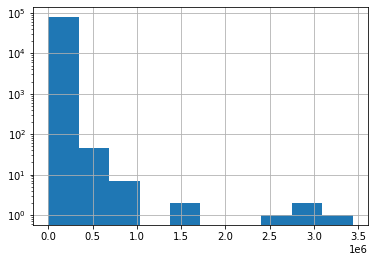

In [16]:
# # check the distribution for income with the nan's
# emp_nan.annual_inc.hist(log=True);

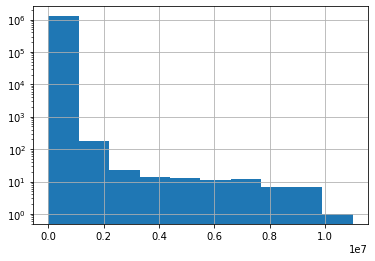

In [17]:
# # the distribution doesn't seem to be very different
# no_nan.annual_inc.hist(log=True);

In [18]:
# # check the proportion of longer or shorter term loans for both subsets
# print("Proportion with the nans")
# print(emp_nan.term.value_counts(normalize=True))
# print("")
# print("Proportion without the nans")
# print(no_nan.term.value_counts(normalize=True))

Proportion with the nans
 36 months    0.843194
 60 months    0.156806
Name: term, dtype: float64

Proportion without the nans
 36 months    0.753511
 60 months    0.246489
Name: term, dtype: float64


This might be a contributer. The subset with more charged off loans has a lower proportion of 60 months loans. Let's see if the longer loans have fewer charged off.

In [19]:
# accepted_df.groupby(['term', 'loan_status']).size().unstack()

loan_status,Charged Off,Fully Paid
term,,
36 months,163252,857491
60 months,105307,219260


It seems to be the opposite, longer loans have a much higher charged off rate. 

I can't think of any accurate way to fill in the missing values, and either way the emp_length doesn't seem to be a major factor, so I will just drop that column. I am more confident doing this since we have the annual income anyway which is the more telling feature.

In [20]:
# accepted_df.dropna(subset=['zip_code', 'dti', 'emp_length'], inplace=True)
# accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266781 entries, 0 to 2260697
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   term              1266781 non-null  object 
 1   int_rate          1266781 non-null  float64
 2   grade             1266781 non-null  object 
 3   dti               1266781 non-null  float64
 4   loan_status       1266781 non-null  object 
 5   emp_length        1266781 non-null  object 
 6   loan_amnt         1266781 non-null  float64
 7   annual_inc        1266781 non-null  float64
 8   application_type  1266781 non-null  object 
 9   home_ownership    1266781 non-null  object 
 10  issue_d           1266781 non-null  object 
 11  zip_code          1266781 non-null  object 
dtypes: float64(4), object(8)
memory usage: 125.6+ MB


The dataframe is still 116 MB. I would like to shrink it down to at least 50 MB so that it is easier to run it through a classifiying algorithm. I'll take the loans from the last few years. Hopefully that won't weaken the model.

In [21]:
# accepted_df.issue_d

0          Dec-2015
1          Dec-2015
2          Dec-2015
4          Dec-2015
5          Dec-2015
             ...   
2260688    Oct-2016
2260690    Oct-2016
2260691    Oct-2016
2260692    Oct-2016
2260697    Oct-2016
Name: issue_d, Length: 1266781, dtype: object

In [22]:
# # change the issue_d to a datetime object and sort the dataframe by date and change the name to date
# accepted_df['issue_d'] = pd.to_datetime(accepted_df['issue_d'])
# accepted_df.sort_values('issue_d', inplace=True)
# accepted_df.reset_index(drop=True, inplace=True)
# accepted_df.rename(columns={'issue_d': 'date'}, inplace=True)
# # take the loans since 2016
# last_3_yr = accepted_df[accepted_df.date >= '2016-01'].copy()
# last_3_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482754 entries, 784027 to 1266780
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   term              482754 non-null  object        
 1   int_rate          482754 non-null  float64       
 2   grade             482754 non-null  object        
 3   dti               482754 non-null  float64       
 4   loan_status       482754 non-null  object        
 5   emp_length        482754 non-null  object        
 6   loan_amnt         482754 non-null  float64       
 7   annual_inc        482754 non-null  float64       
 8   application_type  482754 non-null  object        
 9   home_ownership    482754 non-null  object        
 10  date              482754 non-null  datetime64[ns]
 11  zip_code          482754 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 47.9+ MB


In [23]:
# last_3_yr = accepted_df[accepted_df.date >= '2016-01'].copy()
# last_3_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482754 entries, 784027 to 1266780
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   term              482754 non-null  object        
 1   int_rate          482754 non-null  float64       
 2   grade             482754 non-null  object        
 3   dti               482754 non-null  float64       
 4   loan_status       482754 non-null  object        
 5   emp_length        482754 non-null  object        
 6   loan_amnt         482754 non-null  float64       
 7   annual_inc        482754 non-null  float64       
 8   application_type  482754 non-null  object        
 9   home_ownership    482754 non-null  object        
 10  date              482754 non-null  datetime64[ns]
 11  zip_code          482754 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 47.9+ MB


In order to avoid having to read in the whole dataframe each time, I'll save this dataframe to a csv.

In [24]:
# last_3_yr['loan_status'] = last_3_yr.loc[:,'loan_status'].map({'Fully Paid' : 0, 'Charged Off': 1})
# last_3_yr.to_csv('data/accepted_16_to_18.csv', index=False)

I will now do this for the rejected dataset.

In [25]:
# rejected_df

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0


In [26]:
# rejected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [27]:
# rejected_df.isna().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

I'm going to use this dataset to compare it with the accepted loans, so I will drop the features that aren't in the accepted loans.

In [28]:
# rejected_df.drop(['Risk_Score', 'Policy Code', 'State', 'Loan Title'], axis=1, inplace=True)
# rejected_df.dropna(inplace=True)

In [29]:
# rejected_df.shape

(26697093, 5)

Now I'll make the date column a datetime object and take the last 3 years again, like I did for the other dataset.

In [30]:
# rejected_df['Application Date'] = pd.to_datetime(rejected_df['Application Date'])
# # rename columns to match the accepted dataframe
# rename_dict = {'Application Date': 'date', 'Amount Requested': 'loan_amnt', 
#                'Debt-To-Income Ratio': 'dti', 'Employment Length': 'emp_length',
#               'Zip Code': 'zip_code'}
# rejected_df.rename(columns=rename_dict, inplace=True)

In [34]:
# last_3_yr_rejected = rejected_df[rejected_df.date >= '2016-01'].sort_values('date').reset_index(drop=True)
# last_3_yr_rejected

,loan_amnt,date,dti,zip_code,emp_length
0,35000.0,2016-01-01,100%,708xx,< 1 year
1,5000.0,2016-01-01,4.82%,064xx,< 1 year
2,12000.0,2016-01-01,55.89%,713xx,< 1 year
3,6000.0,2016-01-01,2.44%,217xx,5 years
4,17000.0,2016-01-01,11.31%,300xx,5 years
...,...,...,...,...,...
20512402,10000.0,2018-12-31,16.61%,720xx,< 1 year
20512403,20000.0,2018-12-31,57.15%,333xx,< 1 year
20512404,10000.0,2018-12-31,18.95%,678xx,< 1 year
20512405,5000.0,2018-12-31,89.08%,344xx,< 1 year


In [35]:
# last_3_yr_rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20512407 entries, 0 to 20512406
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   loan_amnt   float64       
 1   date        datetime64[ns]
 2   dti         object        
 3   zip_code    object        
 4   emp_length  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 782.5+ MB


This dataframe is still too big to upload to github, but I'll still save this as a csv so I don't need to load the full dataset.

In [36]:
# last_3_yr_rejected.to_csv('data/rejected_16_to_18.csv', index=False)

In [ ]:
accepted_df = pd.read_csv('data/accepted_16_to_18.csv')
accepted_df

In [37]:
notebook_end = time.time()
print(f'This notebook takes {round(notebook_end - notebook_start)} seconds to run')

This notebook takes 559 seconds to run
